# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df_Og = pd.read_csv("E:\\Desktop\\fenny_lab\\EV_Data.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Og.copy()
df.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,NaN,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


# Data cleaning

In [3]:
df.isnull().sum()

Unnamed: 0                                                                0
Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference f

In [4]:
df["Profession"].fillna("No Profession", inplace = True) 
df

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,No Profession,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,No Profession,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,No Profession,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,No Profession,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,No Profession,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,No Profession,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,No Profession,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"


In [5]:
df.isnull().sum().sum()

0

In [6]:
list(df.columns.values)

['Unnamed: 0',
 'Age',
 'City',
 'Profession',
 'Marital Status',
 'Education',
 'No. of Family members',
 'Annual Income',
 'Would you prefer replacing all your vehicles to Electronic vehicles?',
 'If Yes/Maybe what type of  EV would you prefer?',
 'Do you think Electronic Vehicles are economical?',
 'Which brand of vehicle do you currently own?',
 'How much money could you spend on an Electronic vehicle?',
 'Preference for wheels in EV',
 'Do you think Electronic vehicles will replace fuel cars in India?']

In [7]:
df.shape

(1000, 15)

In [8]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38], dtype=int64)

In [9]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7], dtype=int64)

In [10]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [11]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [12]:
df.drop('Unnamed: 0', axis=1, inplace = True)

# Data visualization

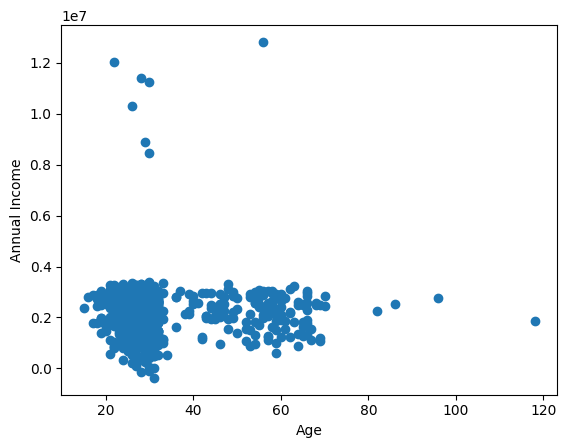

In [13]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])
plt.show()

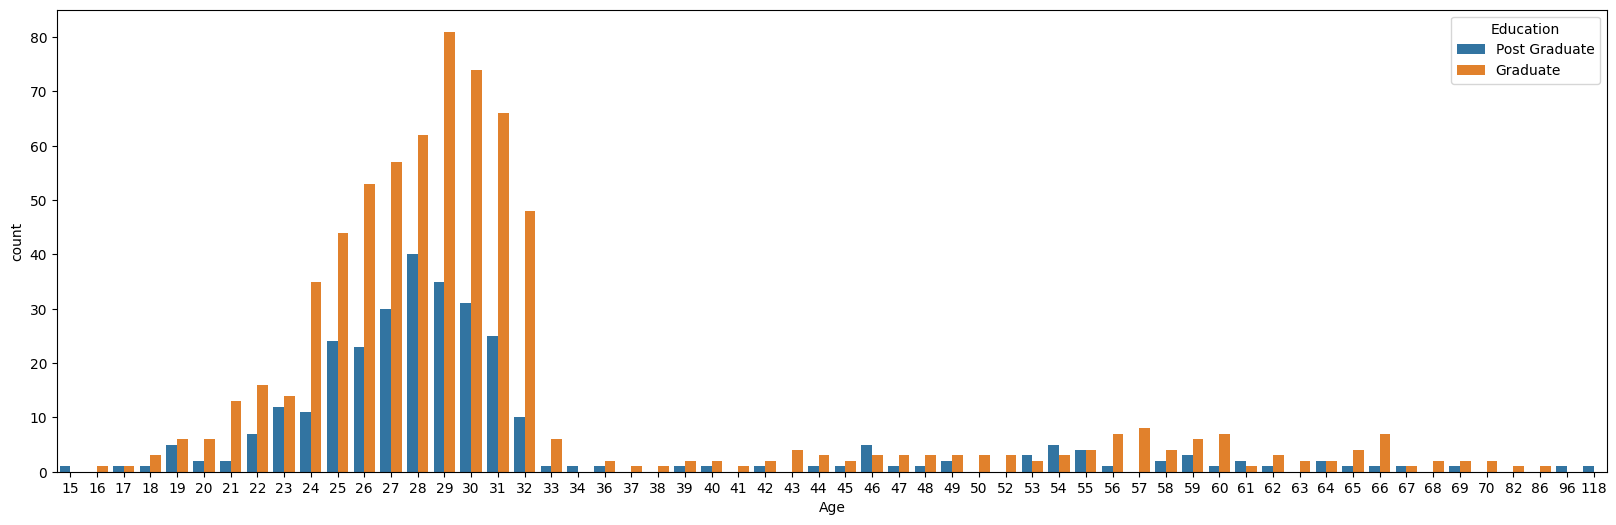

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")
plt.show()

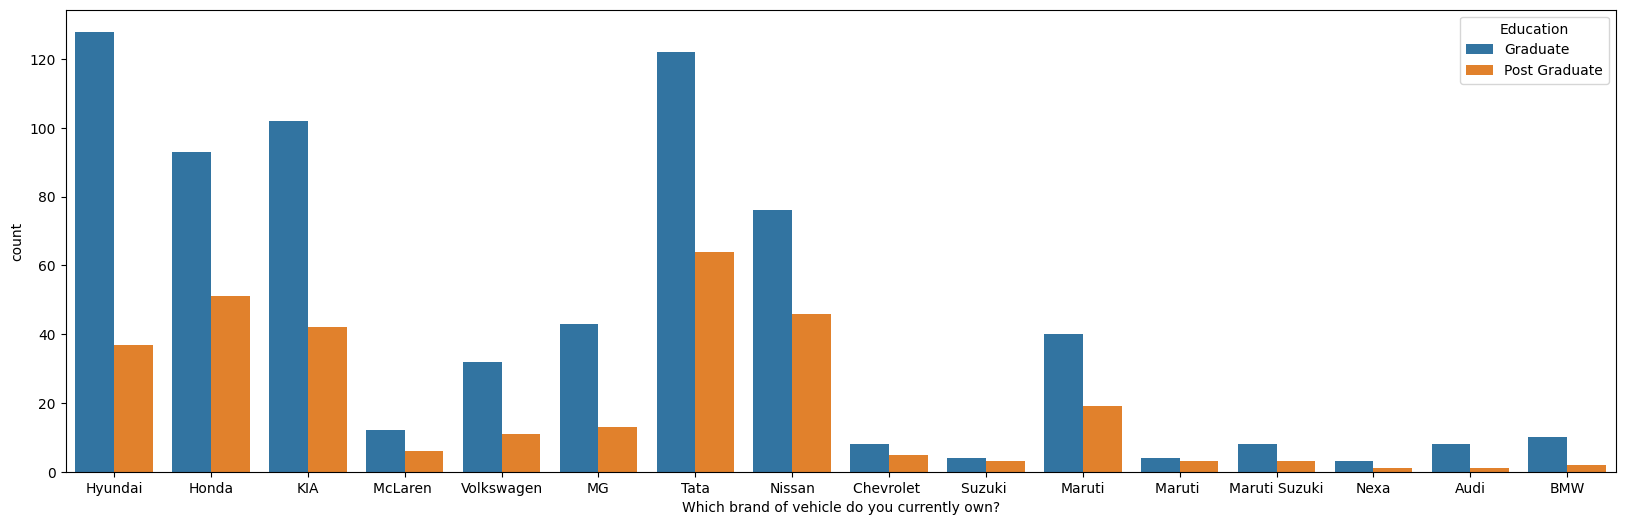

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")
plt.show()

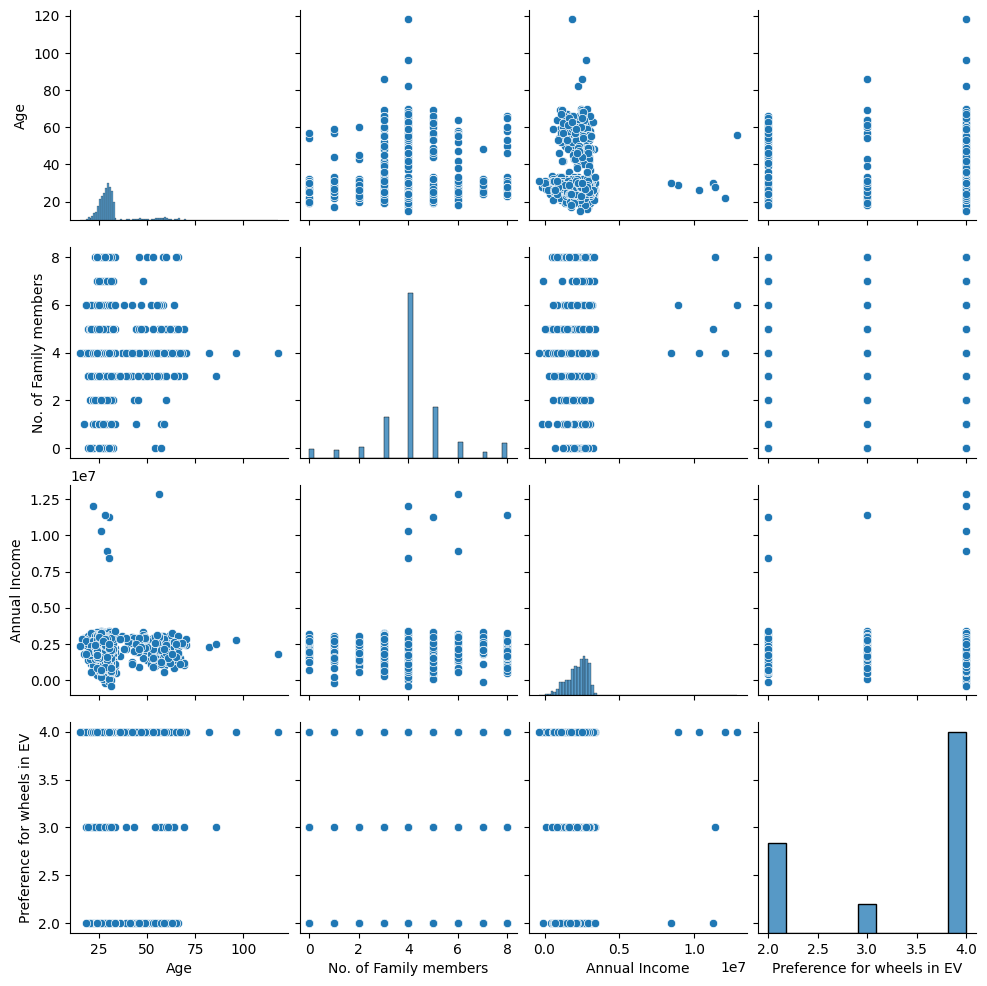

In [16]:
sns.pairplot(df)
plt.show()

# Data preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [18]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [19]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,18,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,26,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,15,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,26,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,29,1,1,0,4,2638750.576,2,4,2,10,4,4,2


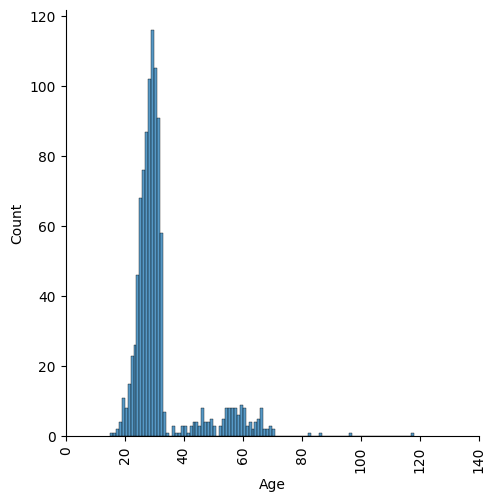

<Figure size 1500x1000 with 0 Axes>

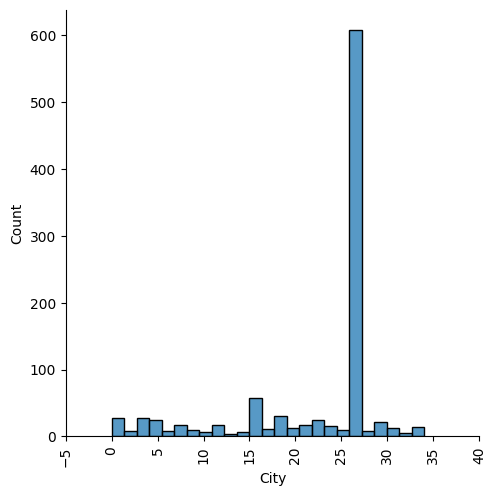

<Figure size 1500x1000 with 0 Axes>

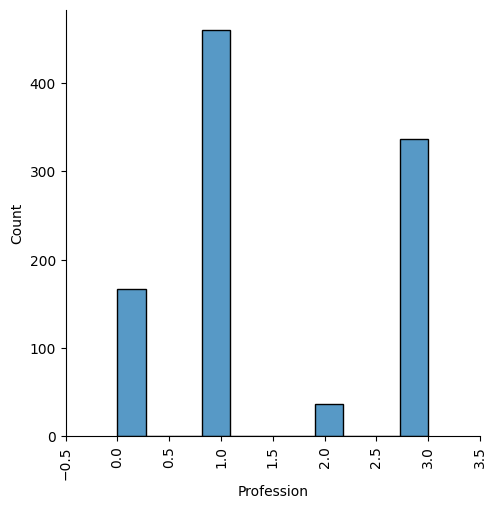

<Figure size 1500x1000 with 0 Axes>

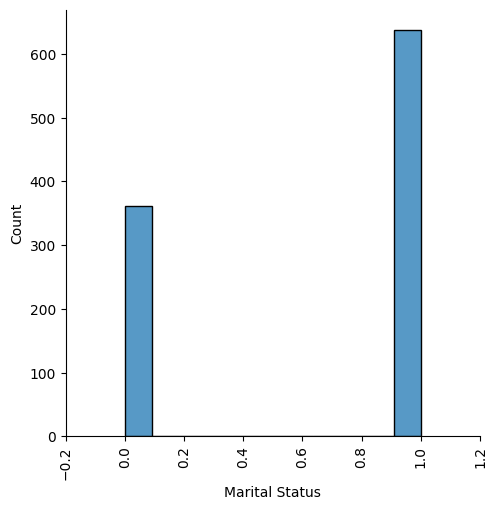

<Figure size 1500x1000 with 0 Axes>

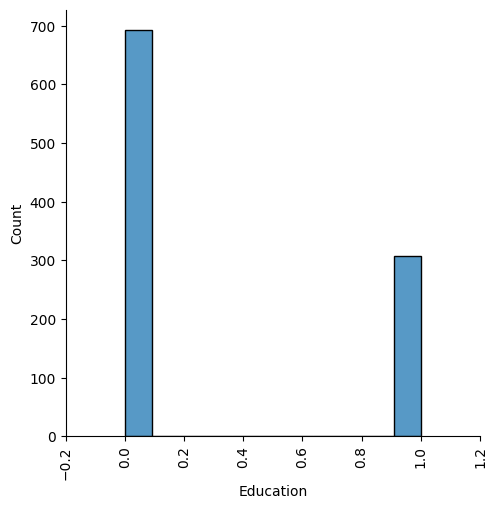

<Figure size 1500x1000 with 0 Axes>

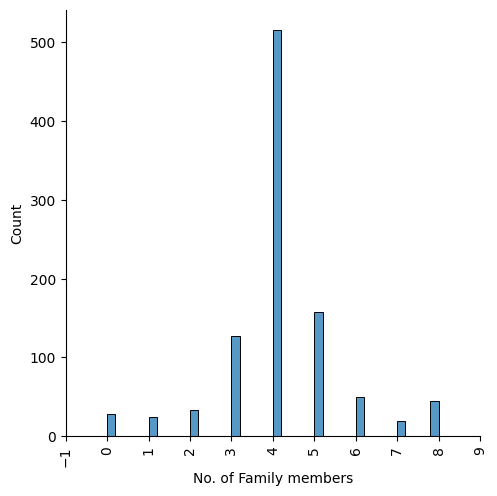

<Figure size 1500x1000 with 0 Axes>

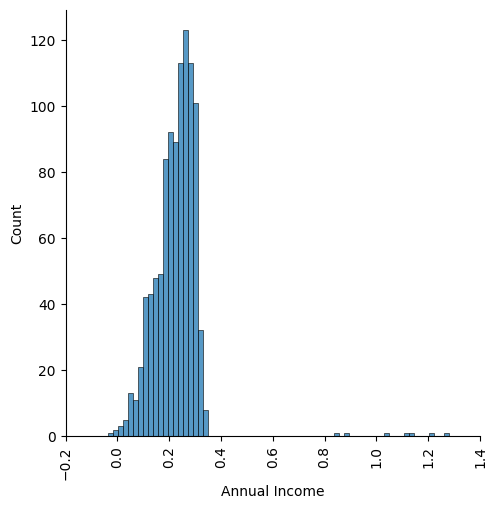

<Figure size 1500x1000 with 0 Axes>

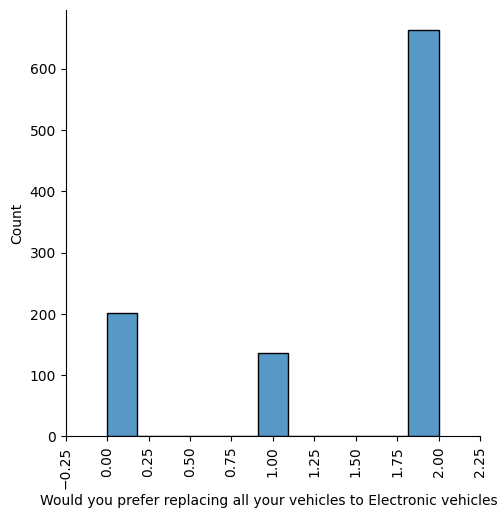

<Figure size 1500x1000 with 0 Axes>

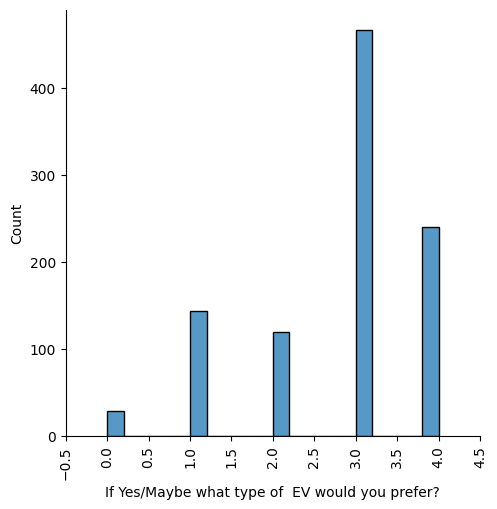

<Figure size 1500x1000 with 0 Axes>

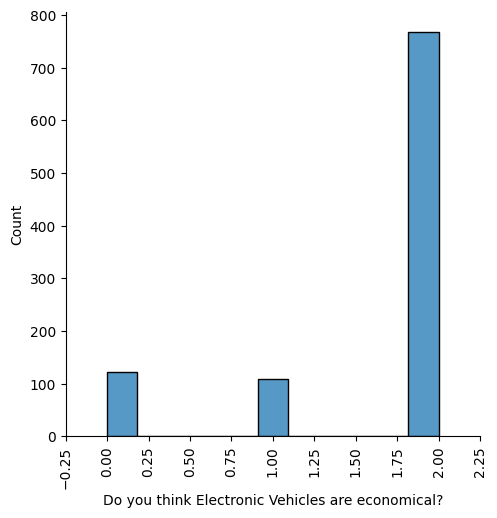

<Figure size 1500x1000 with 0 Axes>

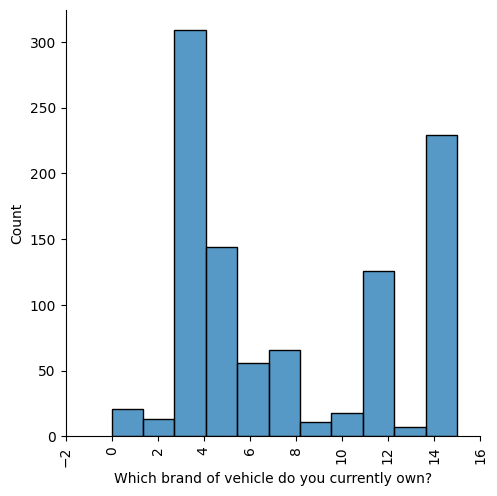

<Figure size 1500x1000 with 0 Axes>

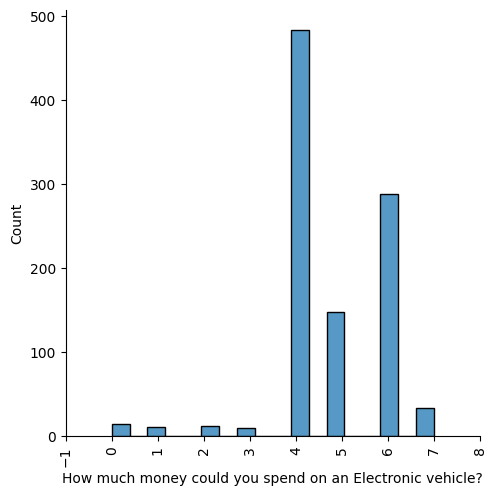

<Figure size 1500x1000 with 0 Axes>

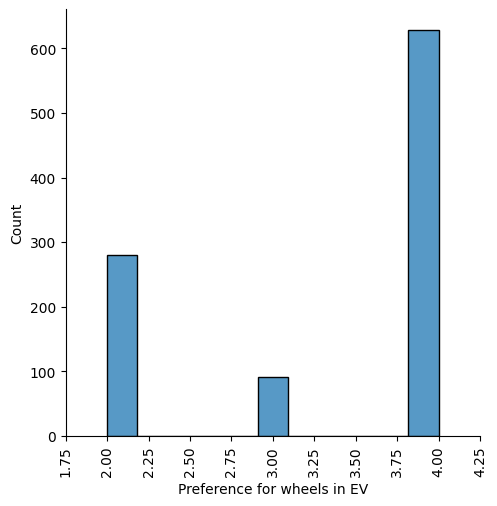

<Figure size 1500x1000 with 0 Axes>

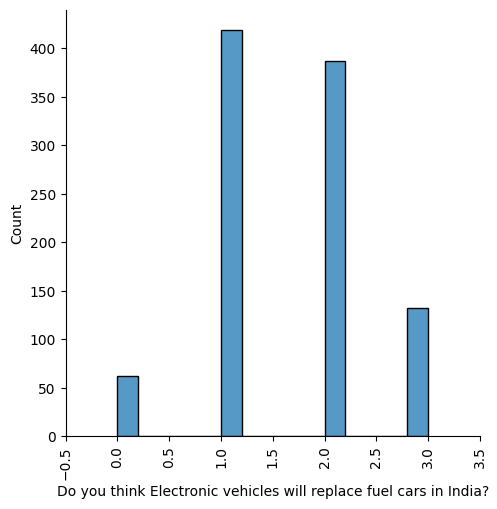

<Figure size 1500x1000 with 0 Axes>

In [23]:
for col in df.columns:
    ax= sns.displot(df[col])
    plt.figure(figsize=(15,10))
    ax.set_xticklabels(rotation=90)

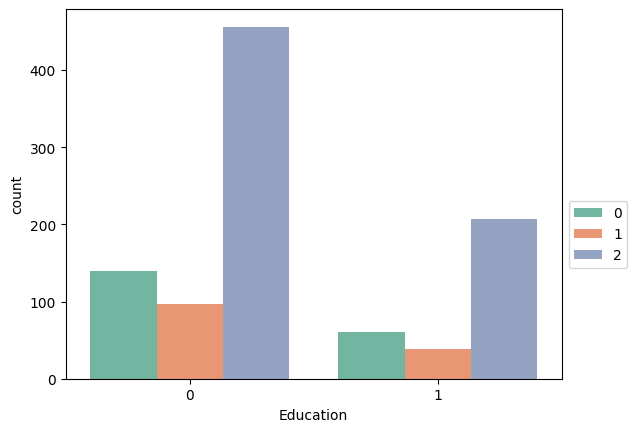

In [24]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

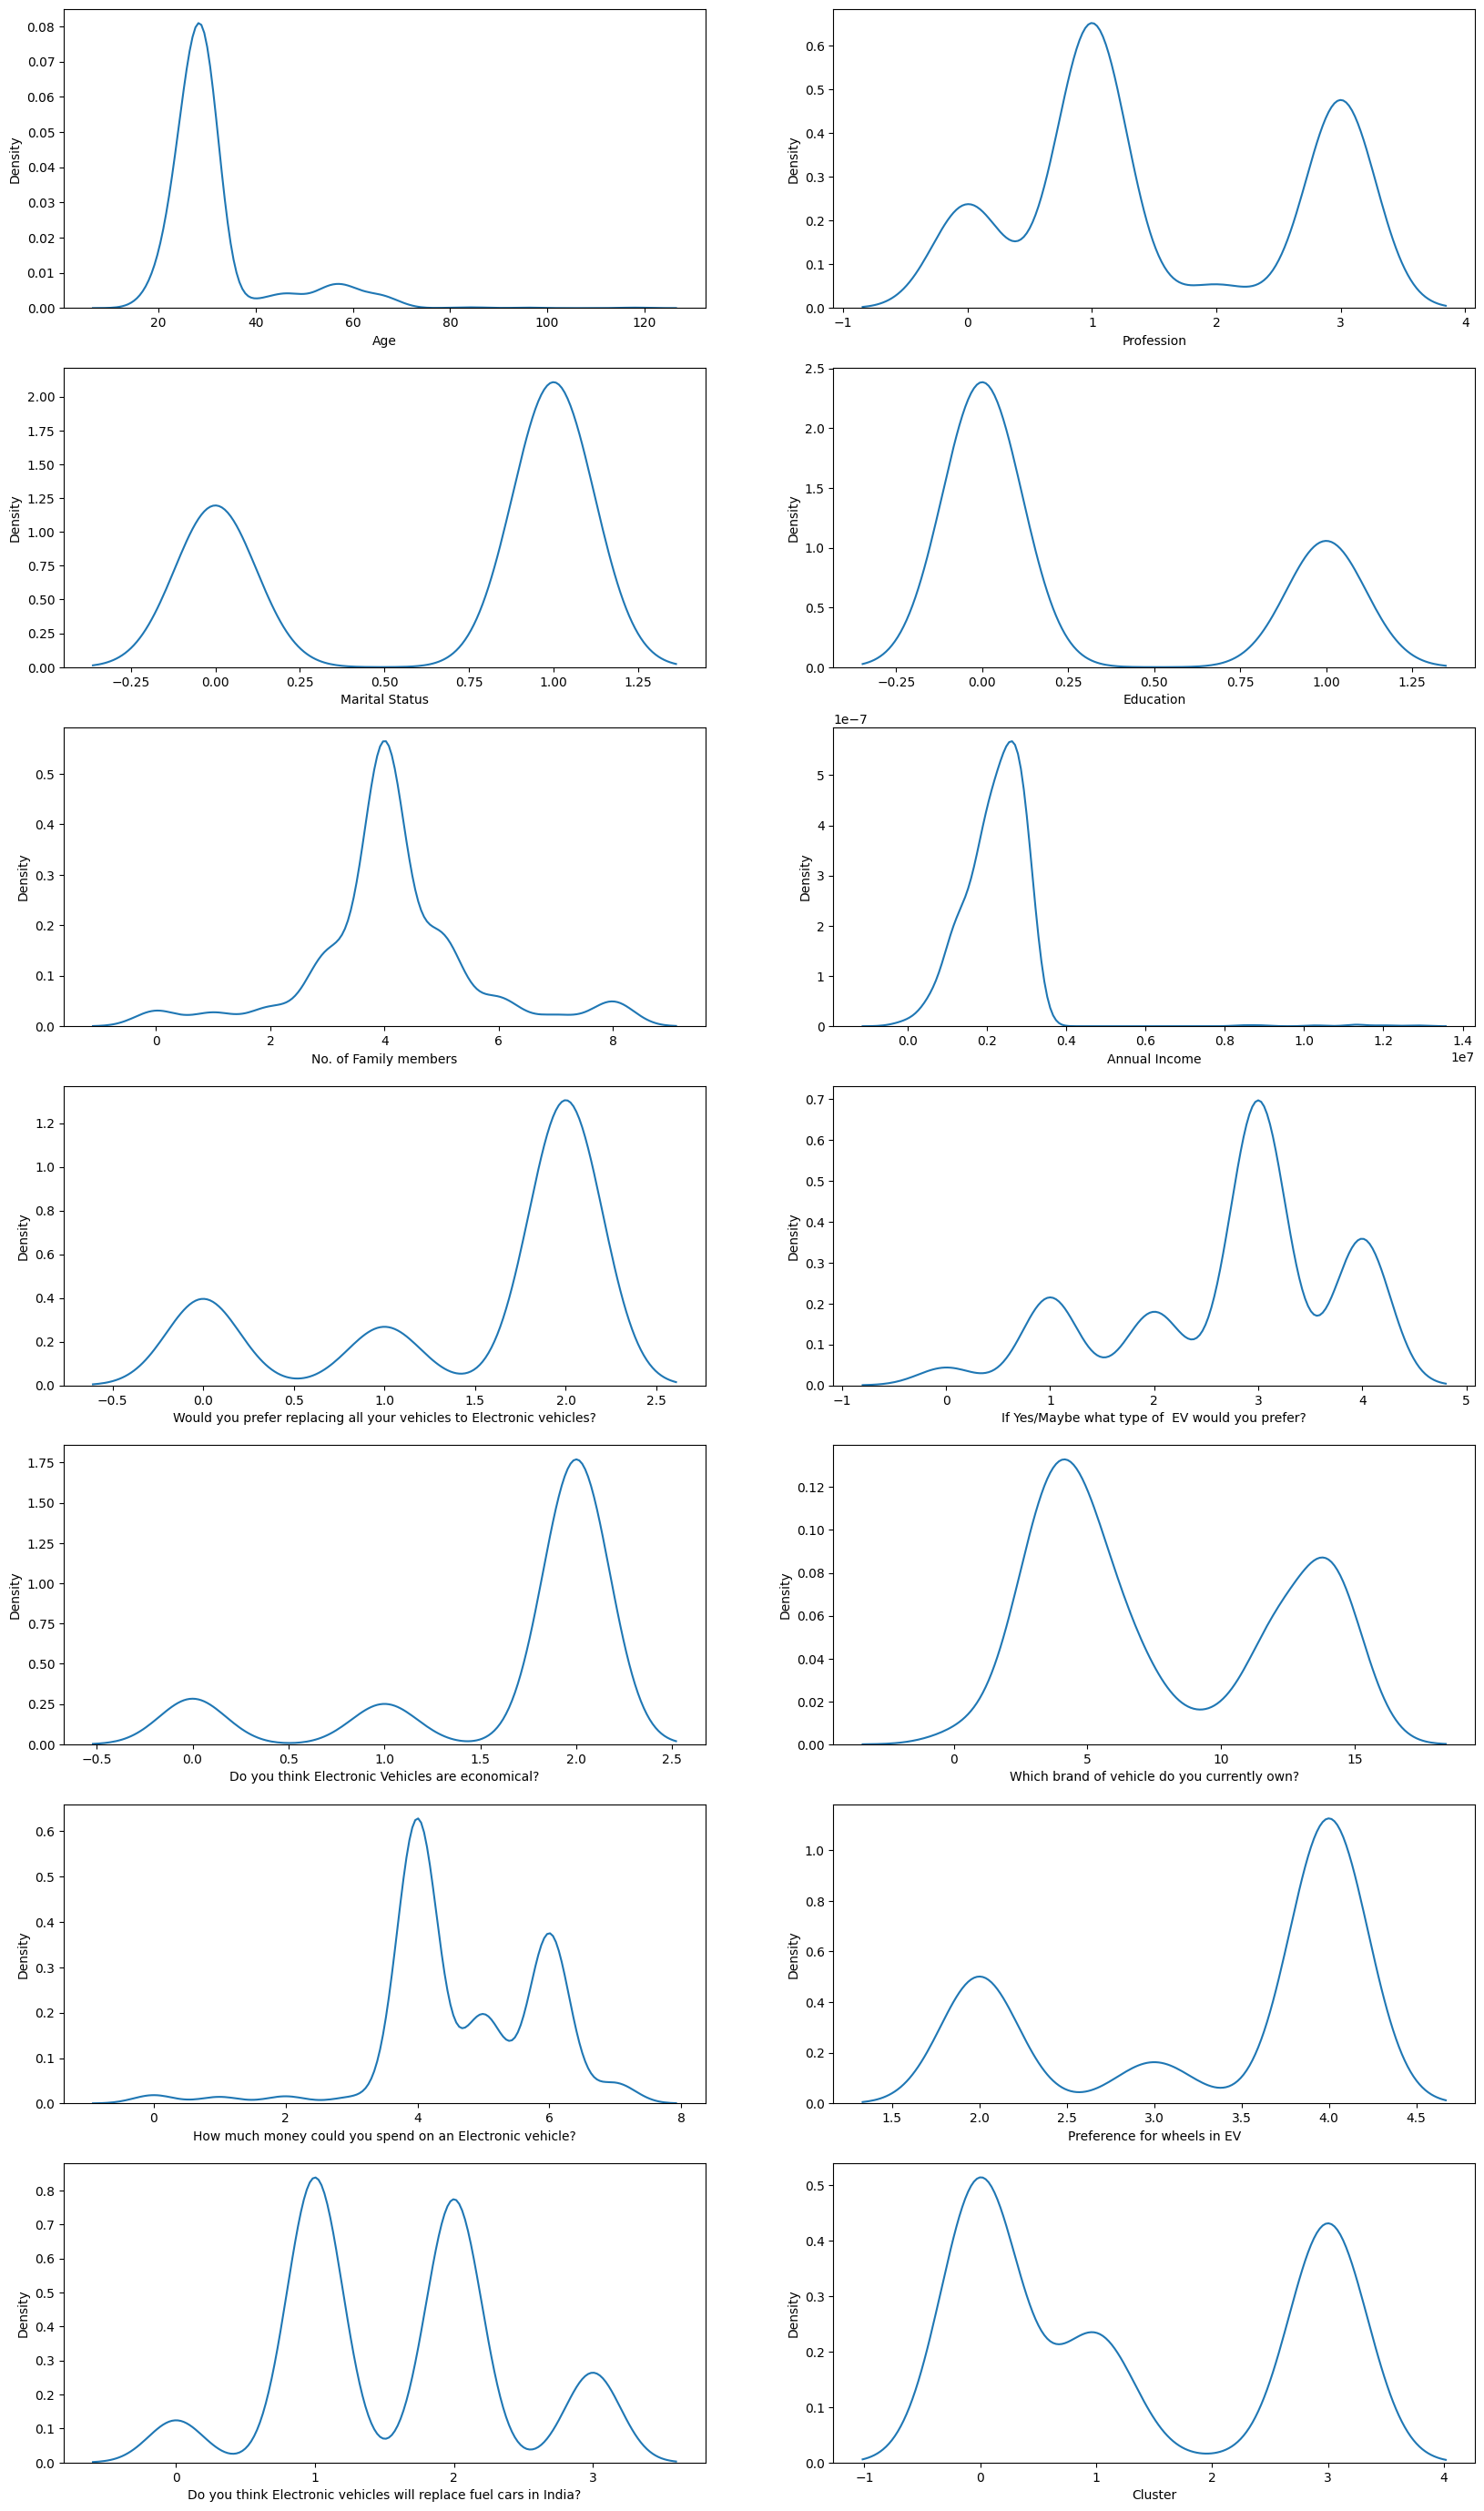

In [73]:
#It tells you where is the density of the atrributes in the dataset
plt.figure(figsize=(20,35))
for i, col in enumerate (df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(7, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
    
plt.show()

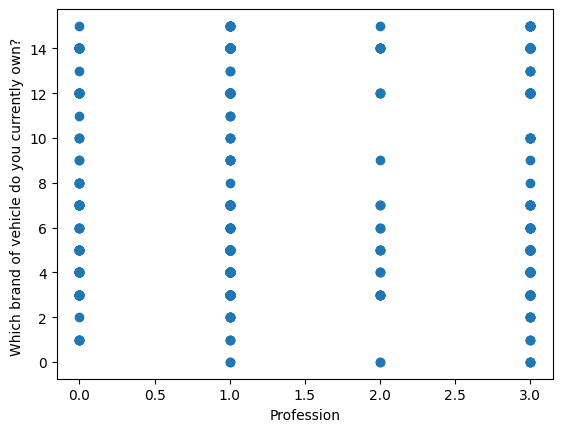

In [25]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

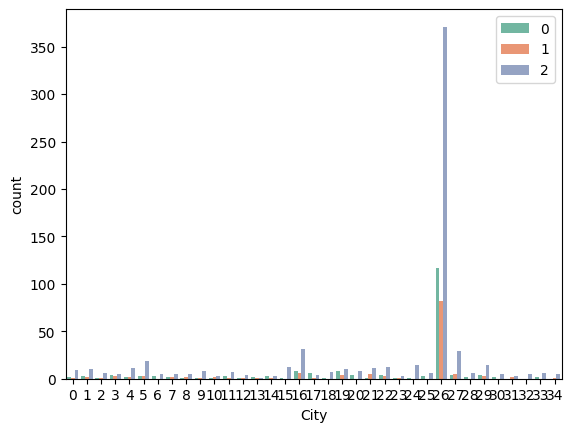

In [39]:
sns.countplot(x ='City', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

In [43]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [44]:
X = df.iloc[:,:-1]
calc_vif(X)

In [45]:
df.head()

,Age,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,1,1,0,4,2638750.576,2,4,2,10,4,4,2


VIF equal to 1 = variables are not correlated, VIF between 1 and 5 = variables are moderately correlated, VIF greater than 5 = variables are highly correlated

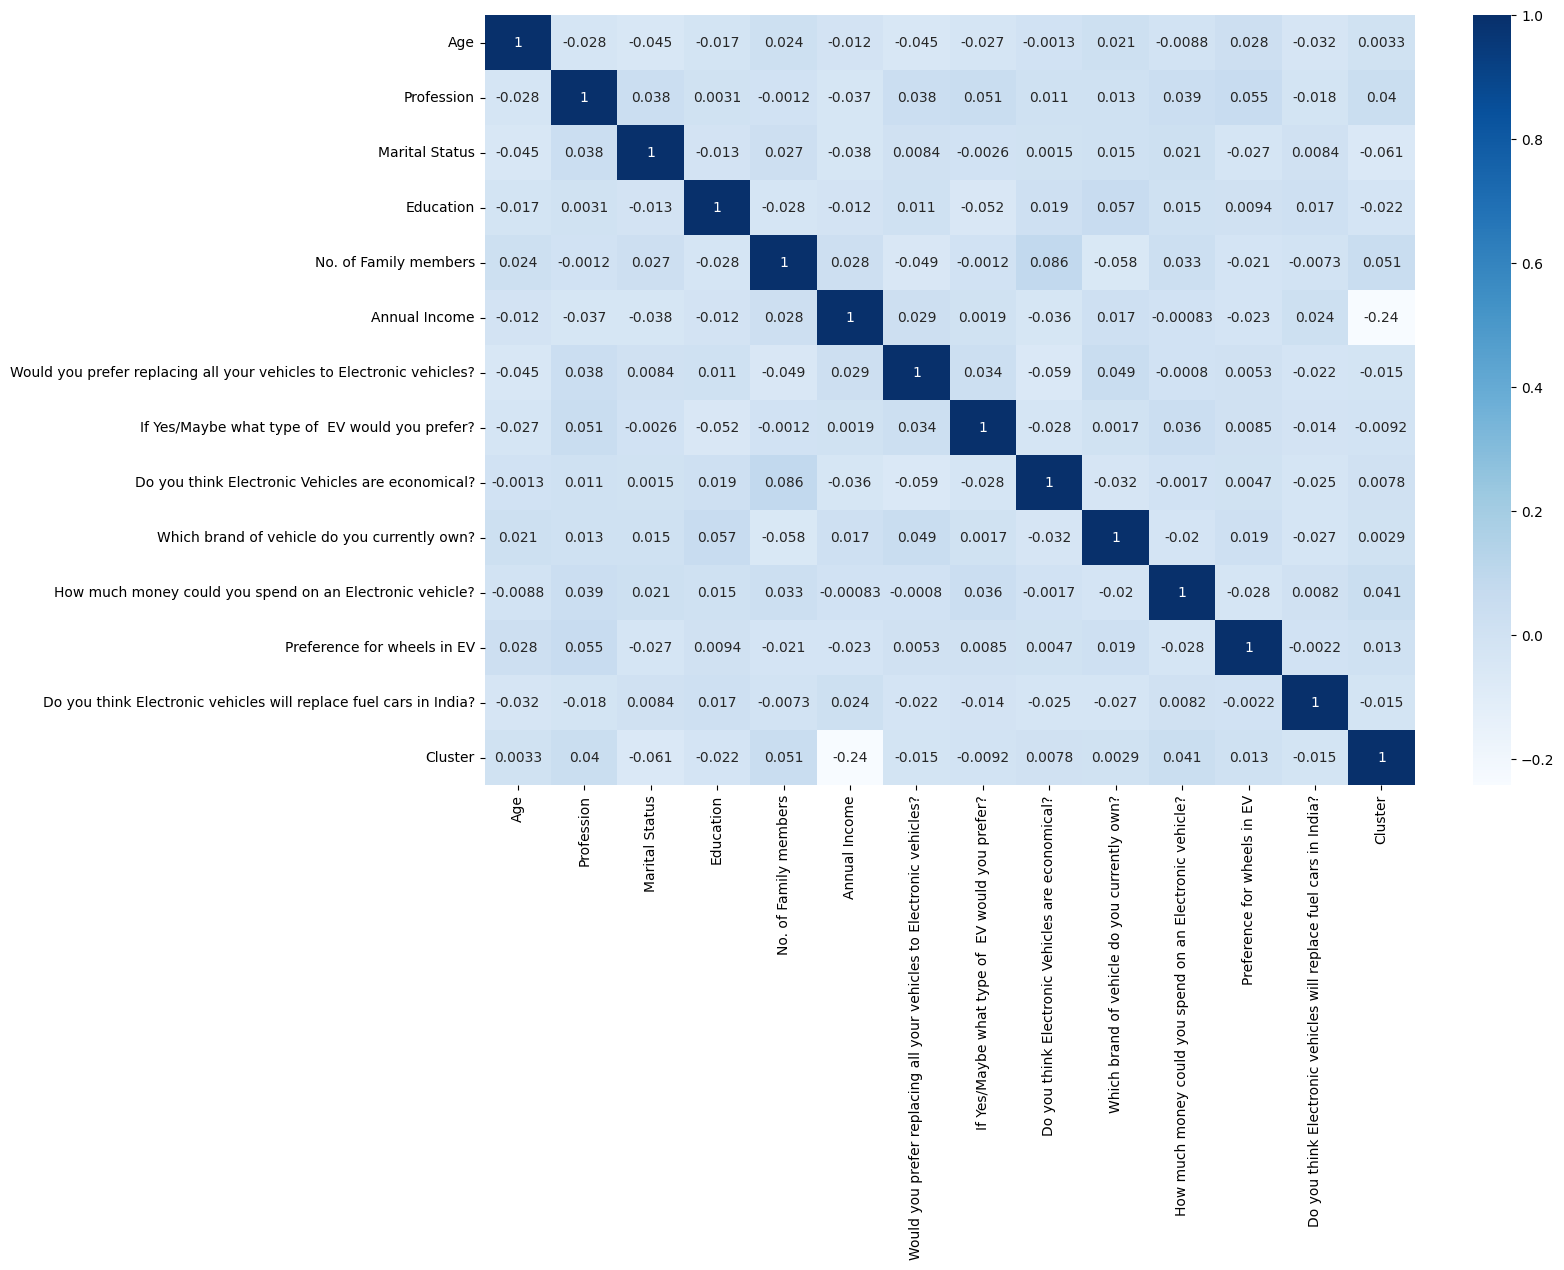

In [52]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

### K MEANS MODEL

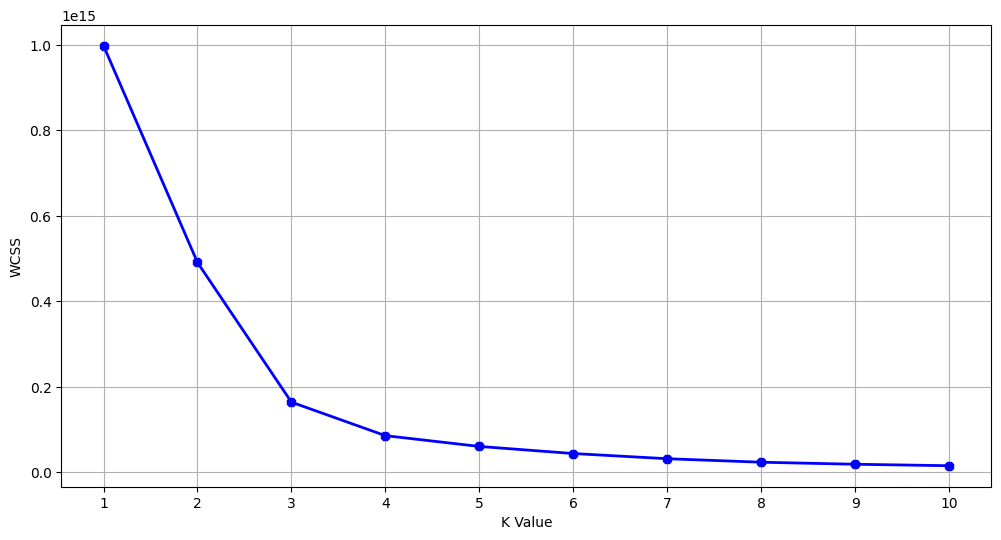

In [48]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


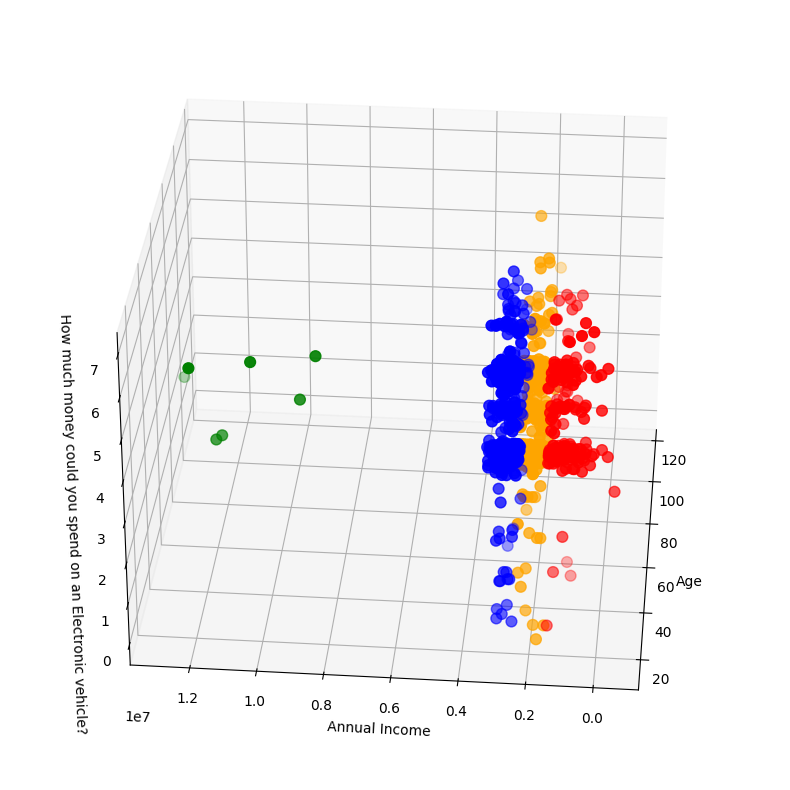

In [50]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Og["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [54]:
df1=df_Og.copy()
df1

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,NaN,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,1,27,Pune,NaN,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
2,2,32,Kashipur,NaN,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",0
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",0
4,4,26,Satara,NaN,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,NaN,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",3
996,996,29,Pune,NaN,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",3
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
998,998,24,Ahmedabad,NaN,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",3


In [55]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [56]:
df1['Cluster'].value_counts()

Cluster
0    434
3    366
1    193
2      7
Name: count, dtype: int64

More customers belong to Cluster 0 & 3, 
Cluster 2 & 1 has very less customers

In [57]:
# Segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(7, 16)

In [58]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[Age
 29    48
 28    43
 30    43
 Name: count, dtype: int64,
 Age
 31    27
 30    23
 29    22
 Name: count, dtype: int64,
 Age
 30    2
 26    1
 29    1
 Name: count, dtype: int64,
 Age
 29    45
 28    42
 30    37
 Name: count, dtype: int64]

Targeting the 28-31 Age Bracket from Clusters 0 & 3

In [59]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[City
 Pune         281
 New Delhi     28
 Mumbai        24
 Bengaluru     12
 Haldwani      10
 Name: count, dtype: int64,
 City
 Pune         106
 Mumbai        14
 New Delhi     11
 Haldwani       6
 Chennai        6
 Name: count, dtype: int64,
 City
 Pune         4
 Mumbai       2
 Ahmedabad    1
 Name: count, dtype: int64,
 City
 Pune         230
 New Delhi     18
 Mumbai        16
 Haldwani      11
 Satara         9
 Name: count, dtype: int64]

# 1.'Pune' and 'Mumbai' emerge as prime locations to establish an early foothold in the EV segment market.
# 2.'New Delhi' and 'Haldwani' warrant secondary consideration for market development.
# 3.'Satara' and 'Bengaluru' come next in line for strategic expansion efforts

In [60]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[Profession
 Working Professional    136
 Business                 73
 Salaried                 15
 Name: count, dtype: int64,
 Profession
 Working Professional    66
 Business                32
 Salaried                 8
 Name: count, dtype: int64,
 Profession
 Working Professional    1
 Business                1
 Name: count, dtype: int64,
 Profession
 Working Professional    133
 Business                 61
 Salaried                 14
 Name: count, dtype: int64]

In [61]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

[2808684.4456641255, 1092645.106776382, 10737228.104106281, 2058283.2568936772]

Cluster 0 customers have Higher Average Income(Rs. 2808684.44), Cluster 1 & 2 have lower Average Income

In [62]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Marital Status
 Single     285
 Married    149
 Name: count, dtype: int64,
 Marital Status
 Single     132
 Married     61
 Name: count, dtype: int64,
 Marital Status
 Married    5
 Single     2
 Name: count, dtype: int64,
 Marital Status
 Single     219
 Married    147
 Name: count, dtype: int64]

In [63]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Would you prefer replacing all your vehicles to Electronic vehicles?
Yes      146
Maybe     40
No        33
Name: count, dtype: int64

In [64]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

[No. of Family members
 4    234
 5     63
 3     59
 6     22
 2     14
 Name: count, dtype: int64,
 No. of Family members
 4    87
 5    37
 3    22
 6    13
 8    12
 Name: count, dtype: int64,
 No. of Family members
 4    3
 6    2
 5    1
 8    1
 Name: count, dtype: int64,
 No. of Family members
 4    192
 5     57
 3     46
 8     22
 6     13
 Name: count, dtype: int64]

Households consisting of 3-5 members exhibit a greater inclination towards Electric Vehicles (EVs).

In [65]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Which brand of vehicle do you currently own?
 Tata       79
 Hyundai    71
 Honda      66
 KIA        62
 Nissan     53
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       36
 Hyundai    31
 KIA        28
 Honda      26
 Nissan     22
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       68
 Hyundai    62
 KIA        53
 Honda      51
 Nissan     47
 Name: count, dtype: int64]

In [66]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Education
 Graduate         300
 Post Graduate    134
 Name: count, dtype: int64,
 Education
 Graduate         128
 Post Graduate     65
 Name: count, dtype: int64,
 Education
 Graduate         5
 Post Graduate    2
 Name: count, dtype: int64,
 Education
 Graduate         260
 Post Graduate    106
 Name: count, dtype: int64]

In [67]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Would you prefer replacing all your vehicles to Electronic vehicles?
Yes      175
Maybe     51
No        34
Name: count, dtype: int64

In [70]:
y= df_Og['Would you prefer replacing all your vehicles to Electronic vehicles?']
z=df_Og['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

864

# Out of a total of 1000 customers surveyed, 864 have expressed interest in Electric Vehicles (EVs).








In [71]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(3))

If Yes/Maybe what type of  EV would you prefer?
SUV          193
Sedan        116
Hatchback     63
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV         96
Sedan       38
Liftback    30
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV          3
Sedan        2
Hatchback    1
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV          175
Sedan         84
Hatchback     54
Name: count, dtype: int64


People are more interested in buying SUV's, followed by Sedan and Hatchback in EV Segments

In [72]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head())

How much money could you spend on an Electronic vehicle?
<15 lakhs    219
<5 lakhs     128
<25 lakhs     49
>25 lakhs     15
1200000        7
Name: count, dtype: int64
How much money could you spend on an Electronic vehicle?
<15 lakhs    102
<5 lakhs      51
<25 lakhs     29
>25 lakhs      5
1200000        3
Name: count, dtype: int64
How much money could you spend on an Electronic vehicle?
<15 lakhs    3
<5 lakhs     3
<25 lakhs    1
Name: count, dtype: int64
How much money could you spend on an Electronic vehicle?
<15 lakhs    159
<5 lakhs     106
<25 lakhs     69
>25 lakhs     14
700000         6
Name: count, dtype: int64


# conclusion



49.09% of people only wants to spend <15 lakhs for EV
Only 5.47% of people willing to spend more than 25 lakhs

From the data, it's evident that the majority of customers prefer to invest less than 15 lakhs for their Electric Vehicles (EVs), particularly favoring SUVs, Sedans, and Hatchbacks. Notably, in terms of affordability and manufacturing costs, focusing on producing Sedans priced below 15 lakhs seems most advantageous for the company. For SUVs, only a small fraction, approximately 15.32% of customers, are willing to pay more than 15 lakhs, indicating a limited market in this higher price range.






